Drug Overdose Data

In [17]:
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv("data/drug-overdose-death-rates new.csv")

In [19]:
df.head()

,Entity,Code,Year,Any opioid death rates (CDC WONDER),Cocaine overdose death rates (CDC WONDER),Heroin overdose death rates (CDC WONDER),Synthetic opioids death rates (CDC WONDER),Prescription Opioids death rates (US CDC WONDER)
0,United States,USA,1999,2.9,1.4,0.7,0.3,1.2
1,United States,USA,2000,3.0,1.3,0.7,0.3,1.3
2,United States,USA,2001,3.3,1.3,0.6,0.3,1.7
3,United States,USA,2002,4.1,1.6,0.7,0.4,2.3
4,United States,USA,2003,4.5,1.8,0.7,0.5,2.6


Types of Drug are as follows:

1. Opioids are a class of drugs used to reduce pain.
2. CDC WONDER is a system for disseminating Public Health data and information.
3. Synthetic Opioids are substances that are synthesized in a laboratory and that act on the same targets in the brain as natural opioids (e.g., morphine and codeine) to produce analgesic (pain relief) effects.
4. Prescription Opioids The Basics Prescription opioids can be used to treat moderate-to-severe pain and are often prescribed following surgery or injury, or for health conditions such as cancer. The most commonly prescribed opioids include the following: Hydrocodone (Vicodin®) Oxycodone (OxyContin®, Percocet®)

#### Rename our columns to make it easier

In [20]:
# Rename the column
df.rename(columns={'Year': 'year'}, inplace=True)
df.rename(columns={'Any opioid death rates (CDC WONDER)': 'any_opioid'}, inplace=True)
df.rename(columns={'Cocaine overdose death rates (CDC WONDER)': 'cocaine'}, inplace=True)
df.rename(columns={'Heroin overdose death rates (CDC WONDER)': 'heroin'}, inplace=True)
df.rename(columns={'Synthetic opioids death rates (CDC WONDER)': 'synthetic_opioid'}, inplace=True)
df.rename(columns={'Prescription Opioids death rates (US CDC WONDER)': 'prescription_opioid'}, inplace=True)

### Exploratory Data Analysis (EDA)

* Dataset info

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               22 non-null     object 
 1   Code                 22 non-null     object 
 2   year                 22 non-null     int64  
 3   any_opioid           22 non-null     float64
 4   cocaine              22 non-null     float64
 5   heroin               22 non-null     float64
 6   synthetic_opioid     22 non-null     float64
 7   prescription_opioid  22 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.5+ KB


* Number of rows and columns

In [22]:
df.shape

(22, 8)

* Data type of each column

In [23]:
df.dtypes

Entity                  object
Code                    object
year                     int64
any_opioid             float64
cocaine                float64
heroin                 float64
synthetic_opioid       float64
prescription_opioid    float64
dtype: object

* Check for missing values/null

In [24]:
df.isnull().sum()

Entity                 0
Code                   0
year                   0
any_opioid             0
cocaine                0
heroin                 0
synthetic_opioid       0
prescription_opioid    0
dtype: int64

### Summarizing Data

In [25]:
df.describe()

,year,any_opioid,cocaine,heroin,synthetic_opioid,prescription_opioid
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2009.500000,8.231818,2.350000,2.081818,3.145455,3.809091
std,6.493587,4.856747,1.351454,1.685692,4.716004,1.256567
min,1999.000000,2.900000,1.300000,0.600000,0.300000,1.200000
25%,2004.250000,4.800000,1.425000,0.700000,0.600000,2.975000
50%,2009.500000,6.700000,1.750000,1.050000,0.850000,4.350000
75%,2014.750000,10.050000,2.425000,3.925000,2.775000,4.675000
max,2020.000000,21.400000,6.000000,4.900000,17.800000,5.200000


Look closely at a few columns

In [26]:
# There are only one value in the entity as well as the code column so we can get rid of them as we know its only for the USA
df['Entity'].unique()

array(['United States'], dtype=object)

In [27]:
df['Code'].unique()

array(['USA'], dtype=object)

### Data Visualization

* Heatmap

<Axes: >

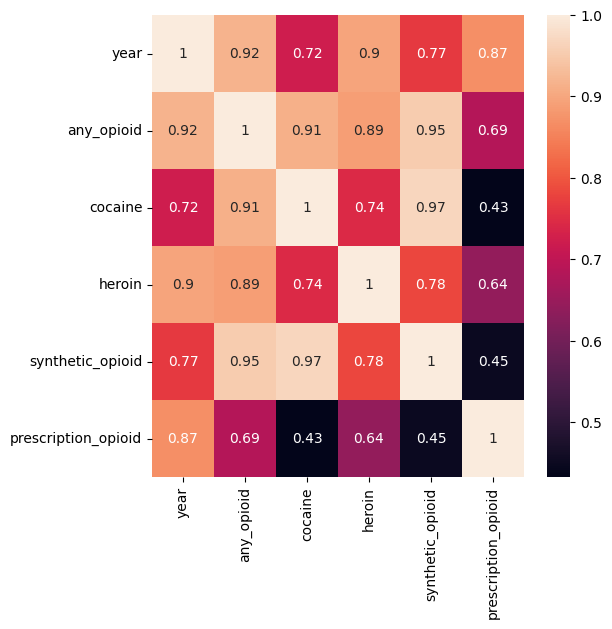

In [28]:
drug_df = df.drop(['Entity', 'Code'], axis = 1)

corr = drug_df.corr()
plt.figure(figsize = (6, 6))
sns.heatmap(corr, annot = True)

#### Line Graphing Data

In [29]:
df.columns

Index(['Entity', 'Code', 'year', 'any_opioid', 'cocaine', 'heroin',
       'synthetic_opioid', 'prescription_opioid'],
      dtype='object')

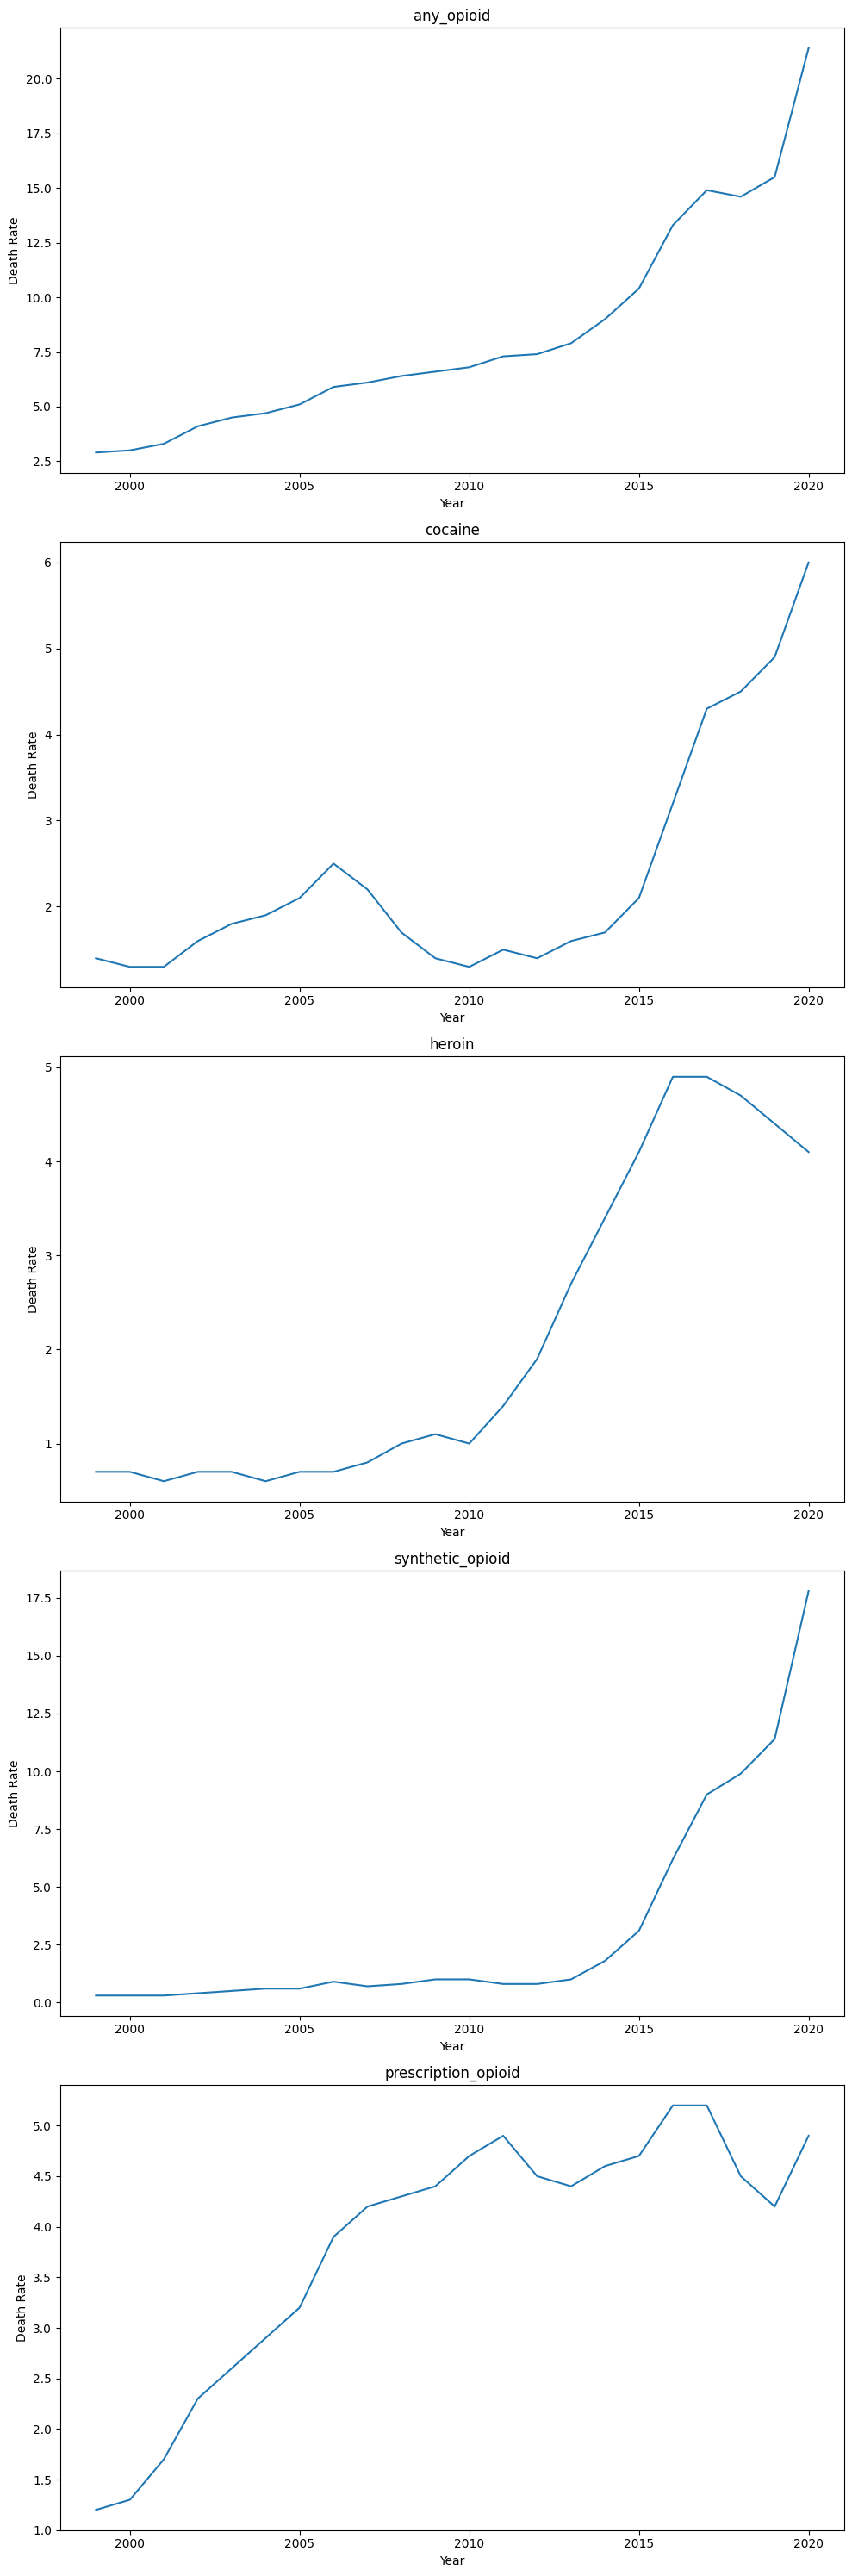

In [30]:
# Check death rates per 100,000 people over the years
years = drug_df['year'] # extracts the 'year' column from the drug_df DataFrame, 
opioids = ['any_opioid', # creates a list of column names corresponding to different opioids.
           'cocaine',
           'heroin',
           'synthetic_opioid',
           'prescription_opioid']
# creates a figure and a set of subplots. The number of subplots (len(opioids)) is equal to the number of opioids, 
# # arranged in a single column (1), with each subplot having a size of 10x6 inches.
f, ax = plt.subplots(len(opioids), 1, figsize=(10, 6*len(opioids)))
#  starts a loop over the list of opioids. i is the index, and opioid is the name of the opioid for each iteration.
for i, opioid in enumerate(opioids):
    ax[i].plot(years, drug_df[opioid]) # plots the death rate data for each opioid against the years. The subplot ax[i] corresponds to the i-th opioid.
    ax[i].set_title(opioid)
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Death Rate')
# automatically adjusts subplot parameters to give specified padding, ensuring that the subplots fit well within the figure.
plt.tight_layout()
# renders and displays the figure with all the subplots.
plt.show()


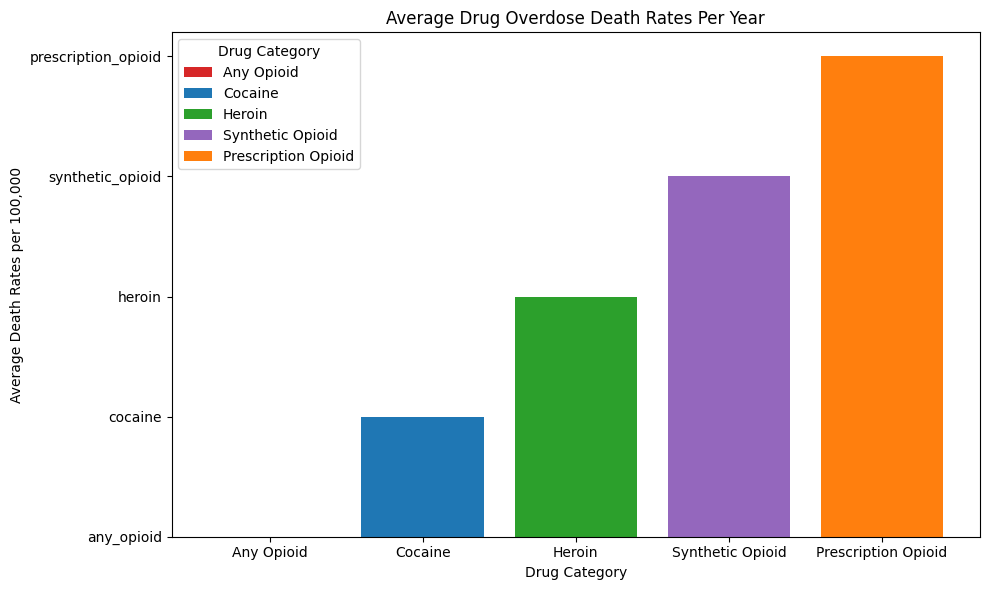

In [31]:
# Example data (replace with your actual data)
categories = ['Any Opioid', 'Cocaine', 'Heroin', 'Synthetic Opioid', 'Prescription Opioid']
averages = ['any_opioid', 'cocaine', 'heroin', 'synthetic_opioid', 'prescription_opioid']
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange']

fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar graph
bars = ax.bar(categories, averages, color=colors)

# Add labels
ax.set_ylabel('Average Death Rates per 100,000')
ax.set_title('Average Drug Overdose Death Rates Per Year')
ax.set_xlabel('Drug Category')

# Add legend (optional)
ax.legend(handles=bars, labels=categories, title='Drug Category')

# Show the plot
plt.tight_layout()
plt.show()



### Line Graphing Data

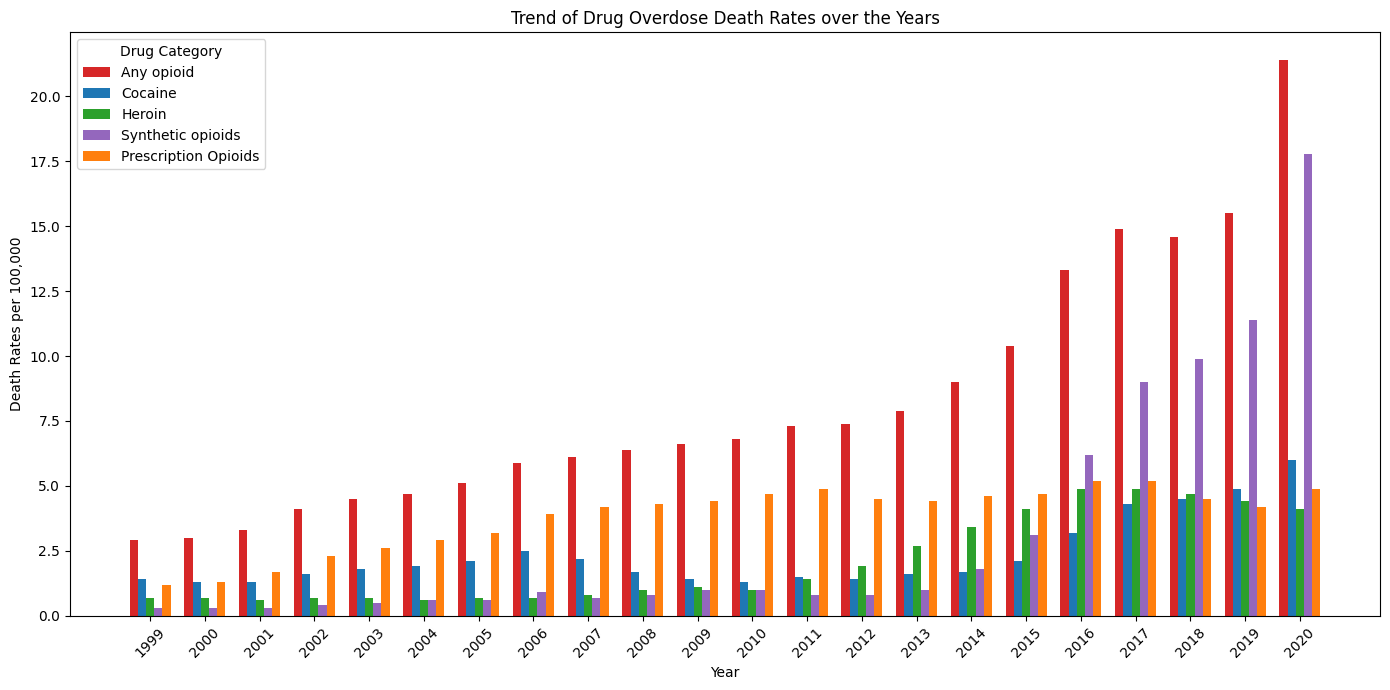

In [32]:
df = drug_df

fig, ax = plt.subplots(figsize=(14, 7))

bar_width = 0.15
years = df["year"]
indices = range(len(years))

# Plot each category with an offset to avoid overlap
ax.bar([i - 2 * bar_width for i in indices], df['any_opioid'], bar_width, label='Any opioid', color='tab:red')
ax.bar([i - bar_width for i in indices], df['cocaine'], bar_width, label='Cocaine', color='tab:blue')
ax.bar(indices, df['heroin'], bar_width, label='Heroin', color='tab:green')
ax.bar([i + bar_width for i in indices], df['synthetic_opioid'], bar_width, label='Synthetic opioids', color='tab:purple')
ax.bar([i + 2 * bar_width for i in indices], df['prescription_opioid'], bar_width, label='Prescription Opioids', color='tab:orange')

# Setting labels and title
ax.set_ylabel('Death Rates per 100,000')
ax.set_xlabel('Year')
ax.set_title('Trend of Drug Overdose Death Rates over the Years')
ax.set_xticks(indices)
ax.set_xticklabels(years)
ax.legend(title='Drug Category')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Get averages from each drug column by using .mean()

In [33]:
any_opioid_death_rates = df['any_opioid'].mean()
print(f"The Average of Any Opioid Death Rates is {any_opioid_death_rates}")

cocaine = df["cocaine"].mean()
print(f"The Average of Any Cocaine Death Rates is {cocaine}")

heroin = df["heroin"].mean()
print(f"The Average of Any Heroin Death Rates is {heroin}")

synthetic_opioid = df["synthetic_opioid"].mean()
print(f"The Average of Any Synthetic Opiod Death Rates is {synthetic_opioid}")

prescription_opioid = df["prescription_opioid"].mean()
print(f"The Average of Any Prescription Opiod Death Rates is {prescription_opioid}")

The Average of Any Opioid Death Rates is 8.231818181818182
The Average of Any Cocaine Death Rates is 2.3499999999999996
The Average of Any Heroin Death Rates is 2.0818181818181816
The Average of Any Synthetic Opiod Death Rates is 3.1454545454545455
The Average of Any Prescription Opiod Death Rates is 3.8090909090909095


#### Bar graph for drug overdose column averages

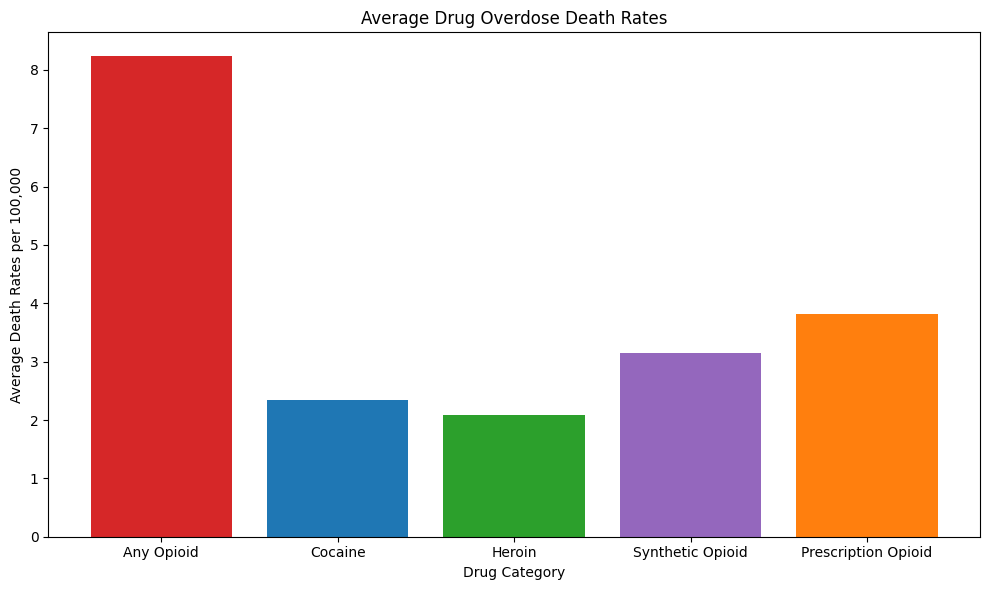

In [34]:
# Data for the bar graph
categories = ['Any Opioid', 'Cocaine', 'Heroin', 'Synthetic Opioid', 'Prescription Opioid']
averages = [any_opioid_death_rates, cocaine, heroin, synthetic_opioid, prescription_opioid]
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange']

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(categories, averages, color=colors)

# Setting labels and title
ax.set_ylabel('Average Death Rates per 100,000')
ax.set_title('Average Drug Overdose Death Rates')
ax.set_xlabel('Drug Category')

# Display the plot
plt.tight_layout()
plt.show()

#### Pie graph showing percentages of drug overdose

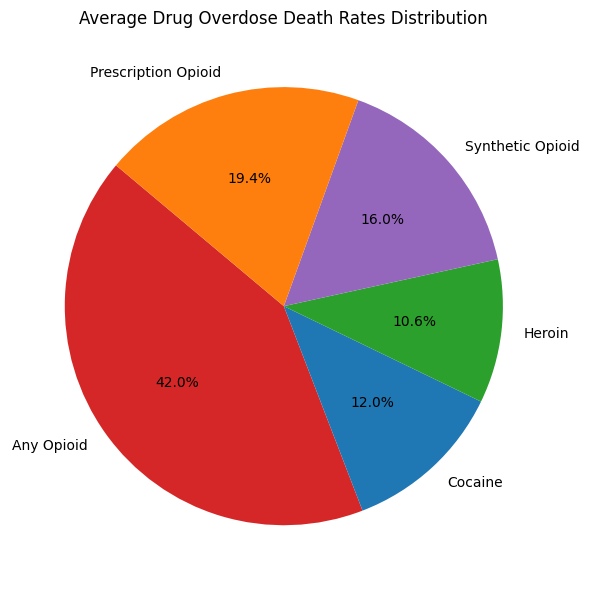

In [35]:
# Data for the pie chart
data = [any_opioid_death_rates, cocaine, heroin, synthetic_opioid, prescription_opioid]
labels = ['Any Opioid', 'Cocaine', 'Heroin', 'Synthetic Opioid', 'Prescription Opioid']
# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# Setting the title
ax.set_title('Average Drug Overdose Death Rates Distribution')
# Create a legend
# ax.legend()
#Display the plot
plt.tight_layout()
plt.show()


In [36]:
df['year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [37]:
df.shape

(22, 6)

In [38]:
# Save the DataFrame as a pickle file
df.to_pickle('data/drug_overdose_data.pkl')

### Random Forest Regression (ML)

In [39]:
# libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [40]:
drug_df.head(20)

,year,any_opioid,cocaine,heroin,synthetic_opioid,prescription_opioid
0,1999,2.9,1.4,0.7,0.3,1.2
1,2000,3.0,1.3,0.7,0.3,1.3
2,2001,3.3,1.3,0.6,0.3,1.7
3,2002,4.1,1.6,0.7,0.4,2.3
4,2003,4.5,1.8,0.7,0.5,2.6
5,2004,4.7,1.9,0.6,0.6,2.9
6,2005,5.1,2.1,0.7,0.6,3.2
7,2006,5.9,2.5,0.7,0.9,3.9
8,2007,6.1,2.2,0.8,0.7,4.2
9,2008,6.4,1.7,1.0,0.8,4.3


In [41]:
X = drug_df.drop('any_opioid', axis=1)
y = drug_df['any_opioid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training R^2 Score:", train_score) # this stands for the coefficient of determination
# represents the proportion of the variance in the dependent var explained by the independent ones.

print("Testing R^2 Score:", test_score)

Mean Squared Error: 0.2339748000000042
Training R^2 Score: 0.9828597530532035
Testing R^2 Score: 0.9597538874363554
